# **Lab 4: First Draft of Final Project**
    - Salissa Hernandez
    - Juan Carlos Dominguez
    - Leonardo Piedrahita
    - Brice Danvide

# **Objective**

This project investigates the application of **Reinforcement Learning (RL)** to the domain of **autonomous vehicles**, with a focus on enhancing safety and decision-making in dynamic driving environments. The analysis utilizes a **simulated highway environment** (via highway-env) to train an RL agent to perform fundamental tasks such as navigation, obstacle avoidance, and interaction with other vehicles. By implementing and evaluating different RL algorithms, the study aims to assess their effectiveness in facilitating real-time driving decisions and to explore their adaptability for real-world applications.

The **primary objective** is to evaluate how RL can enable an autonomous vehicle to navigate safely and efficiently within a simulated environment and to compare the performance of various RL algorithms in managing complex driving scenarios. Additionally, the project examines the broader implications of RL in autonomous driving, including considerations of safety, efficiency, and ethics, with the goal of providing insights into challenges associated with deploying RL-based systems in real-world autonomous vehicles.

### **Terminology Used in This Project**

To ensure clarity and precision in the analysis, the following key terms are defined for use throughout the project:

- **Reinforcement Learning (RL)**: A machine learning paradigm where an agent learns to make decisions by interacting with an environment, receiving rewards or penalties based on its actions (Medium).
- **Agent**: The autonomous vehicle in this context, which learns to navigate and make driving decisions based on environmental feedback and rewards (OpenAI Spinning Up).
- **Environment**: The simulated world in which the agent operates, encompassing roads, traffic signs, other vehicles, pedestrians, and obstacles (OpenAI Spinning Up).
- **State**: A specific configuration of the environment, including attributes such as the vehicle’s position, speed, distance to obstacles, or presence of other vehicles (OpenAI Spinning Up).
- **Action**: The decision executed by the agent in a given state, such as steering left, accelerating, or braking (OpenAI Spinning Up).
- **Reward**: A numerical value assigned to the agent’s actions, guiding it toward desirable behaviors, such as avoiding collisions or adhering to traffic regulations (OpenAI Spinning Up).
- **Deep Q-Networks (DQN)**: RL algorithm designed to estimate expected future rewards for each action, enabling optimal decision-making in specific states (HuggingFace).
- **Proximal Policy Optimization (PPO)**: A state-of-the-art RL algorithm suited for training in environments with large action spaces, such as controlling a vehicle’s speed and direction (HuggingFace).
- **Advantage Actor-Critic (A2C)**: A synchronous variant of the Actor-Critic algorithm that uses two neural networks—one to predict the policy (actor) and another to estimate the value function (critic). A2C helps balance exploration and exploitation and can be effective in environments where stability and sample efficiency are important (OpenAI Spinning Up, HuggingFace).

**Sources**:

- Medium: https://medium.com/%40gurkanc/deep-reinforcement-learning-agents-algorithms-and-strategies-a-practical-game-scenario-a412428ae0e0  
- OpenAI Spinning Up - Intro to RL: https://spinningup.openai.com/en/latest/spinningup/rl_intro.html  
- HuggingFace (DQN): https://huggingface.co/learn/deep-rl-course/en/unit3/from-q-to-dqn  
- HuggingFace (PPO): https://huggingface.co/blog/deep-rl-ppo  
- HuggingFace (A2C): https://huggingface.co/blog/deep-rl-a2c

**References**:

- https://github.com/Farama-Foundation/HighwayEnv?tab=readme-ov-file
- https://github.com/TeyKra/Reinforcement-Learning-HighwayEnv/blob/main/Reinforcement%20Learning%20HighwayEnv.ipynb

# **1. Motivation**

## **1.1 Motivation for Our Research Project**

Autonomous vehicles (AVs) represent a transformative shift in the transportation industry, offering potential for enhanced safety, accessibility, and efficiency. Despite progress from industry leaders such as Waymo, AVs face significant challenges in consistently making safe, efficient, and ethically sound decisions in real time. These systems must navigate dynamic environments characterized by unpredictable traffic patterns, diverse road conditions, variable weather, and interactions with pedestrians and other vehicles.

Reinforcement learning (RL) provides a promising framework for optimizing AV decision-making through experience-based learning. Unlike rule-based or supervised approaches, RL agents learn optimal policies by interacting with their environment, enabling flexible and adaptive responses to novel situations. This study investigates how RL can enhance AV performance in terms of safety, efficiency, and adaptability, with the aim of developing robust navigation strategies that reduce accident rates and improve traffic flow.

The **motivation behind this project is to investigate how RL can improve AVs’ performance in terms of safety, efficiency, and adaptability**. By leveraging RL algorithms, we aim to enhance an autonomous vehicle’s ability to make intelligent decisions—such as when to accelerate, brake, or avoid obstacles—based on contextual information. These algorithms can generalize across varied driving scenarios, which may lead to more robust navigation strategies, reduced accident rates, and improved overall traffic efficiency.

The societal impetus for this research stems from the need to mitigate the high incidence of accidents caused by human error, which accounts for over 90% of vehicular crashes according to the National Highway Traffic Safety Administration (NHTSA). AVs have the potential to eliminate risks associated with distraction, fatigue, and impaired judgment, while also improving mobility for individuals unable to drive and reducing emissions through optimized driving patterns. This project contributes to the advancement of autonomous technologies by exploring RL as a scalable and adaptive framework for intelligent decision-making in complex driving environments.

## **1.2 Importance of the Investigation**

This research addresses critical challenges in autonomous driving: ensuring safety and enabling real-time decision-making in uncertain environments. Current AV systems, such as Tesla’s Autopilot, Waymo’s Driver, and Cruise’s Origin platform, have made significant strides but struggle with emergent, high-stakes scenarios, including sudden pedestrian crossings, dynamic lane changes, traffic signal malfunctions, construction detours, and adverse weather conditions. High-profile incidents highlight these limitations. For instance, in 2023, Cruise suspended operations nationwide after a San Francisco incident where a vehicle failed to yield appropriately, dragging a pedestrian following a collision. Similarly, Tesla’s Autopilot has faced National Highway Traffic Safety Administration (NHTSA) investigations for collisions with stationary emergency vehicles and phantom braking, while Waymo’s overly cautious behavior has disrupted traffic flow.

These issues stem from the rigidity of deterministic or supervised-learning-based frameworks, which rely on predefined rules or labeled datasets and struggle to generalize to rare or novel situations. RL offers a compelling alternative by allowing agents to iteratively refine behavior through environmental feedback, learning nuanced behaviors—such as yielding to aggressive drivers or adjusting speed in low-visibility conditions—that are difficult to hand-code or annotate.

The investigation is timely given the growing deployment of AVs on public roads, where safety is paramount. By evaluating RL algorithms in realistic, simulated driving scenarios, this study seeks to provide initial insights into developing robust, scalable, and safe autonomous systems, thereby supporting public trust and regulatory approval for large-scale adoption.

**References** 
- National Highway Traffic Safety Administration (NHTSA). (2015). Critical Reasons for Crashes Investigated in the National Motor Vehicle Crash Causation Survey.
- Tesla AI Team. (2021). Tesla Autonomy Day / AI Day. https://www.tesla.com/AI
- Waymo Safety Report. (2020). https://waymo.com/safety
- Aradi, S. (2020). Survey of deep reinforcement learning for motion planning of autonomous vehicles. IEEE Transactions on Intelligent Transportation Systems, 22(6), 3023-3035.

## **1.3 Related Work**

Significant progress has been made in applying reinforcement learning (RL) and related machine learning techniques to autonomous vehicle systems. Industry leaders like Tesla and Waymo have developed real-time decision-making frameworks using deep neural networks. Tesla’s Autopilot employs end-to-end deep learning for lane detection, object classification, and lane-changing maneuvers, while Waymo’s modular architecture integrates deep learning and imitation learning to navigate complex urban environments (Tesla AI Team, 2021; Waymo Team, 2020).

In academic research, simulation environments are widely used to train RL agents due to safety and cost constraints. The **highway-env** simulator, a lightweight, lane-based platform, supports high-level decision-making in multi-agent traffic scenarios, enabling rapid prototyping compared to high-fidelity simulators like CARLA (Dosovitskiy et al., 2017). RL algorithms such as Deep Q-Networks (DQN) and Proximal Policy Optimization (PPO) have shown success in tasks like lane changing, collision avoidance, and maintaining safe distances under dynamic conditions (Mnih et al., 2015; Schulman et al., 2017).

Foundational work from DeepMind in deep RL, particularly in game-playing and robotic control, has highlighted challenges in generalization, sample efficiency, and policy transfer, which are directly relevant to AVs navigating variable environments (Silver et al., 2016). This study builds on these efforts by evaluating RL algorithms in simulated driving scenarios with unpredictable elements, such as sudden pedestrian crossings or traffic disruptions. Unlike prior work focused on optimal performance in controlled settings, this project emphasizes understanding **generalization limits** and **failure modes** of RL policies under out-of-distribution events, critical for assessing RL’s viability in safety-critical, real-world deployments.

**References**
- Dosovitskiy, A., Ros, G., Codevilla, F., Lopez, A., & Koltun, V. (2017). CARLA: An Open Urban Driving Simulator. *Conference on Robot Learning (CoRL)*.
- Mnih, V., Kavukcuoglu, K., Silver, D., et al. (2015). Human-level control through deep reinforcement learning. *Nature*.
- Schulman, J., Wolski, F., Dhariwal, P., Radford, A., & Klimov, O. (2017). Proximal Policy Optimization Algorithms. *arXiv preprint arXiv:1707.06347*.
- Silver, D., Huang, A., Maddison, C. J., et al. (2016). Mastering the game of Go with deep neural networks and tree search. *Nature*.
- Tesla AI Team. (2021). *Tesla AI Day 2021*. https://www.tesla.com/AI
- Waymo Team. (2020). *On the Road to Fully Autonomous Driving*. https://waymo.com/research

## **1.4 Main Research Questions**

This research investigates how reinforcement learning (RL) can enhance autonomous vehicle (AV) decision-making in complex, real-world environments. The following questions guide the inquiry:

1. **How can reinforcement learning improve decision-making for autonomous vehicles in high-speed highway environments?**  
   In highway driving, AVs must make rapid decisions while interacting with other vehicles—merging, overtaking, maintaining safe distances, and responding to variable traffic conditions. This study assesses whether RL-based control systems can enable safer, more efficient decisions compared to fixed-policy baselines in simulated highway scenarios using the highway-env environment.

2. **Which RL algorithms are most effective for training autonomous vehicles to navigate traffic, avoid collisions, and adapt to changing environments?**  
   The study compares widely studied RL algorithms—Q-Learning, Deep Q-Networks (DQN), and Proximal Policy Optimization (PPO)—in the highway-env simulator. These algorithms differ in learning dynamics, representational capacity, and suitability for discrete versus continuous action spaces. By evaluating performance across tasks (e.g., lane-following, obstacle avoidance, dynamic rerouting), the research identifies which approach best balances learning efficiency, stability, and safety.

3. **How well do RL agents trained in one driving scenario generalize to new, unseen highway conditions?**  
   High performance in simulation does not ensure success in the physical world. This question examines the “reality gap”: the extent to which learned policies generalize from synthetic to real-world domains. Agent behavior is analyzed under unseen conditions (e.g., increased traffic density, occluded objects, new traffic rules, aggressive driver behavior) to evaluate generalization, robustness, and the need for domain adaptation techniques.

4. **What are the key limitations of using reinforcement learning in autonomous driving, and how can they be mitigated?**  
   Despite its potential, RL poses challenges for AVs, including sample inefficiency, safety during exploration, reward design complexity, and ethical ambiguity in edge-case scenarios (e.g., unavoidable collisions). This study aims to identify these limitations and propose strategies for mitigation, such as incorporating safety constraints, curriculum learning, or hybrid models combining RL with rule-based oversight.

These questions structure the investigation into how RL can serve as a foundation for intelligent, adaptable, and trustworthy autonomous driving systems.

## **1.5 Hypothesis**

This study hypothesizes that **reinforcement learning (RL) algorithms can significantly enhance the real-time decision-making capabilities of autonomous vehicles by enabling agents to learn from environmental interactions and iteratively refine their behavior over time.**

Specifically, the following outcomes are anticipated:
- **Deep Q-Networks (DQN)** are expected to be effective for discrete, task-specific behaviors commonly observed in highway-env scenarios, such as lane keeping, overtaking, and collision avoidance. DQN’s ability to approximate Q-values in high-dimensional observation spaces supports the optimization of long-term safety and efficiency in structured, rule-based traffic environments.
- **Proximal Policy Optimization (PPO)** is predicted to demonstrate superior performance in more complex or adaptive driving tasks, particularly in environments with continuous action components (e.g., speed modulation and strategic decision-making). PPO’s stability and robustness across policy updates make it well-suited for learning consistent, safe behavior under dynamic multi-agent conditions.
- **Advantage Actor-Critic (A2C)** is anticipated to provide a balance between performance and computational efficiency. As a synchronous actor-critic algorithm, A2C uses parallel environments to stabilize learning and is expected to perform well in moderately complex driving scenarios. Its ability to concurrently learn value estimation and policy behavior may lead to effective policy refinement under time constraints or limited training steps.

RL-trained agents are expected to outperform traditional rule-based baselines on key performance metrics, including collision rate, lane discipline (e.g., minimizing unnecessary lane changes), and travel time efficiency (e.g., time to reach a destination). Additionally, these agents are anticipated to exhibit adaptive behavior, such as adjusting speed in response to aggressive drivers or rerouting around obstacles, under variations in traffic density, driver aggressiveness, and environmental layout.

While RL agents are expected to perform well in controlled simulations, their ability to generalize to real-world conditions may be limited. Simulation environments such as highway-env provide valuable platforms for experimentation but lack the sensory noise, complexity, and unpredictability of real-world driving. Bridging this “reality gap” will likely require mechanisms such as domain randomization, hybrid control schemes, or transfer learning techniques.

Overall, this study posits that reinforcement learning offers a promising framework for initial investigation into intelligent and adaptive autonomous driving. However, its effective deployment will depend on addressing persistent challenges related to generalization, safety, and real-world robustness.

# **2. Methodology & Analysis**

## **2.1 Methodology & Analysis**

To investigate how reinforcement learning (RL) can enhance autonomous vehicle decision-making, this study conducts experiments using **highway-env**, a lightweight, configurable simulation environment tailored for high-speed, multi-agent driving scenarios. This environment supports diverse traffic configurations, driver behaviors, and lane-based interactions, making it suitable for controlled yet realistic testing of RL agents. Unlike high-fidelity simulators reliant on detailed graphics or physics, highway-env emphasizes strategic decision-making dynamics—such as lane changes, overtaking, and safe distance maintenance—facilitating rapid prototyping and iteration.

The study employs three RL algorithms: Deep Q-Networks (DQN), Proximal Policy Optimization (PPO), and Advantage Actor-Critic (A2C). DQN leverages deep learning to handle high-dimensional observations and learn optimal policies for discrete action spaces. PPO, an advanced on-policy algorithm, offers stability and sample efficiency, ideal for dynamic, multi-agent environments. A2C, included as an exploratory method, combines value-based and policy-based approaches for stable learning in continuous action spaces.

To address the **first research question**—how RL can improve decision-making in highway environments—experiments simulate common driving challenges, including dense traffic, aggressive driver behaviors, lane merging, and dynamic speed changes. RL agents are trained to maximize cumulative reward functions designed to promote safe, efficient, and rule-compliant behavior, with incentives for lane discipline, collision avoidance, appropriate speed maintenance, and rapid destination arrival. Improvements in agent behavior are analyzed through training curves, reduced collision rates, and enhanced travel efficiency, quantifying the evolution of decision-making.

For the **second research question**, concerning the effectiveness of RL algorithms, DQN, PPO, and A2C are compared under identical training conditions. Performance is evaluated using metrics such as training stability, convergence speed, collision rate, and lane violation frequency. The study also assesses policy generalization to unseen test scenarios, identifying which algorithm best balances learning efficiency, robustness, and real-time safety.

The **third research question** explores how well trained agents generalize to new highway conditions. Environment variables, such as traffic density, driver aggressiveness, and initial spawn positions, are systematically altered. Agents are tested in these modified settings without further training to evaluate policy robustness and flexibility, measured by success rate, behavioral drift, and stability. This analysis highlights strengths and limitations in handling real-world unpredictability.

To investigate the **fourth research question**, addressing RL’s challenges in autonomous driving, ablation studies and stress testing are conducted. These introduce disruptions like sudden lane blockages, incomplete sensory input, and irregular vehicle behaviors to assess agent resilience and identify failure modes. The impact of reward shaping on ethical and safety-critical decisions is analyzed, using penalties for abrupt braking or traffic violations to align with real-world norms. If necessary, hybrid approaches integrating rule-based elements or safety layers are explored to enhance robustness.

Throughout the study, data such as learning curves, action distributions, trajectory visualizations, and video rollouts are logged and analyzed. This combination of algorithm benchmarking, generalization testing, and stress analysis provides a comprehensive foundation for understanding RL’s strengths, limitations, and practical potential in autonomous highway driving.

## **2.2 Environment Setup**

Experiments are conducted using **highway-env**, a Python-based simulation environment designed for testing autonomous driving agents in highway scenarios. This environment offers a simplified yet effective abstraction of real-world driving, simulating multi-lane roads, interacting vehicles, varying traffic densities, and driver behaviors. It supports configurable parameters, including lane numbers, vehicle dynamics, and traffic flow, enabling diverse training and testing conditions that reflect high-speed highway complexities.

The highway-env simulator facilitates both structured tasks, such as lane keeping and destination arrival, and dynamic challenges, like overtaking slower vehicles, avoiding collisions, and responding to sudden traffic changes. Its fine-grained control over parameters and real-time visual feedback support iterative RL development. The environment’s lightweight design allows training over thousands of episodes without the computational burden of high-resolution graphics or physical modeling, ensuring scalable, safe, and repeatable experimentation.

## **2.3 Reinforcement Learning Algorithms**

The study implements the following RL algorithms for comparative analysis:
- **Deep Q-Networks (DQN)**: An RL algorithm leveraging deep neural networks to approximate action-value functions in high-dimensional state spaces. DQN employs experience replay and target networks to stabilize training, effective for sequential decision-making and perception-based control.
- **Proximal Policy Optimization (PPO)**: A state-of-the-art policy gradient method known for sample efficiency and training stability, particularly in continuous action environments like vehicle control, where fine-grained steering and speed adjustments are required.
- **Advantage Actor-Critic (A2C)**: An exploratory policy gradient method combining value-based and policy-based approaches, using an actor to select actions and a critic to evaluate them. A2C is effective in continuous action spaces and supports stable learning.

## **2.4 Experimental Tasks**

To assess algorithm generalizability and robustness, agents are evaluated on a progression of tasks:

1. **Basic Lane-Following**: Tests stability and path adherence under ideal conditions.
2. **Dynamic Vehicle Interaction**: Introduces multi-agent scenarios with varying vehicle speeds and density, requiring safe merging, overtaking, and adaptive responses.
3. **Traffic Rule Compliance**: Evaluates adherence to norms like lane discipline, safe following distances, and yielding behavior.
4. **Environmental Perturbation**: Tests policy robustness under reduced visibility, aggressive drivers, and modified road layouts.

Agents are trained on a subset of tasks and tested on both seen and unseen conditions to measure generalization.

## **2.5 Evaluation Metrics**

The analysis employs quantitative and qualitative metrics:

- **Safety**: Number of collisions, near-misses (e.g., vehicles within a 2-meter threshold), and traffic violations per episode.
- **Efficiency**: Time-to-completion and distance traveled to reach destinations.
- **Reward Accumulation**: Cumulative reward across training and evaluation episodes.
- **Policy Robustness**: Percentage drop in reward or success rate in new or perturbed environments.
- **Convergence Behavior**: Training stability and learning curves across episodes.

These metrics enable comparison of raw performance, reliability, and adaptability across RL approaches.

## **2.6 Analysis Strategy**

The study conducts **intra-algorithm analysis** (evaluating each algorithm’s performance across tasks and conditions) and **inter-algorithm comparison** (benchmarking algorithms against one another). Visualizations, including reward curves, policy heatmaps, and behavioral traces, illustrate differences in decision-making behavior.

Qualitative insights, such as agent hesitation at intersections or failures under occlusion, are recorded through visual inspection and frame-by-frame analysis of edge cases. These findings identify policy limitations and suggest improvements, such as curriculum learning, hybrid models, or safety constraints. This comprehensive approach evaluates RL’s practical potential for autonomous vehicle decision-making in complex environments.

# **3. Visualizations & Results**

## **3.1 Analysis of Research Question 1: How can reinforcement learning improve decision-making for autonomous vehicles in high-speed highway environments?**

This section investigates how reinforcement learning (RL) can enhance decision-making for autonomous vehicles in high-speed highway environments, addressing the first research question. The study compares the behavior and performance of a trained DQN agent against an untrained baseline in the **highway-env** simulator, focusing on improvements in safety, efficiency, and adaptability.

The analysis is supported by two key visualizations: a training reward curve, which tracks the DQN agent’s learning progression over episodes, and a bar plot comparing the mean rewards of the untrained and trained agents. These visualizations, detailed in the following subsections, provide both quantitative and qualitative evidence of RL’s impact on decision-making. The training reward curve illustrates the agent’s ability to learn optimal behaviors over time, while the performance comparison highlights the trained agent’s superior reward accumulation and safer driving strategies compared to the untrained agent’s random actions.

The results demonstrate that RL enables the DQN agent to iteratively refine its decision-making through environmental interactions, aligning with the hypothesis that RL can significantly enhance real-time decision-making capabilities in autonomous vehicles. However, variability in performance suggests areas for further refinement, such as additional training or reward shaping, which also informs the fourth research question regarding RL’s limitations.

In [1]:
# =============================================================================
# Modules & Libraries
# =============================================================================
import numpy as np
import os
import base64
import shutil
import gc
import torch
import highway_env 
import gymnasium as gym
import imageio
import matplotlib.pyplot as plt

from stable_baselines3 import PPO, DQN, A2C
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import SubprocVecEnv
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold, BaseCallback
from moviepy import VideoFileClip, ColorClip, concatenate_videoclips
from IPython import display as ipythondisplay
from IPython.display import Image as IPImage
from pathlib import Path
from tqdm import tqdm
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv
from tabulate import tabulate 
from IPython.display import Image

In [2]:
# =============================================================================
# Code Block for Deleting Existing Video Folder & Clearing Memory
# =============================================================================
video_dir = "../Rough Draft/videos"
if os.path.exists(video_dir):
    shutil.rmtree(video_dir)  
    os.makedirs(video_dir)  

# Clear memory
gc.collect()
torch.cuda.empty_cache() 

## Action space
The "highway-fast-v0" environment uses a discrete action space with 5 actions:

- 0: **LANE_LEFT**: Change lane to the left.
- 1: **IDLE**: Stay in the lane.
- 2: **LANE_RIGHT**: Change lane to the right.
- 3: **FASTER**: Speed up.
- 4: **SLOWER**: Slow down.

Source: https://highway-env.farama.org/actions/

In [3]:
# =============================================================================
# Action Space of the Environment
# =============================================================================
actions_mapping = {
    0: 'LANE_LEFT',
    1: 'IDLE',
    2: 'LANE_RIGHT',
    3: 'FASTER',
    4: 'SLOWER'
}

# Display all available actions
print("Available actions:", actions_mapping)

Available actions: {0: 'LANE_LEFT', 1: 'IDLE', 2: 'LANE_RIGHT', 3: 'FASTER', 4: 'SLOWER'}


### Video & GIF Recording Setup

In [4]:
# =============================================================================
# Fxns to Record & Display Videos/GIF
# =============================================================================
def record_videos_and_frames(env_hwy, model, config, video_length=200, prefix="", video_folder="videos/", fps=10, is_trained=True):
    eval_env = gym.make(env_hwy, render_mode="rgb_array", config=config)
    frames = []
    obs, _ = eval_env.reset()
    
    print(f"\nRecording agent: {prefix}")
    print(f"{'Step':<5} | Action Taken")

    for step in range(video_length):
        if is_trained:
            action, _states = model.predict(obs, deterministic=True)
            action_scalar = int(action) 
        else:
            action_scalar = eval_env.action_space.sample()
            action = np.array([action_scalar])

        action_label = actions_mapping.get(action_scalar, "UNKNOWN")
        print(f"{step:<5} | {action_label}")

        obs, reward, done, truncated, info = eval_env.step(action)

        frame = eval_env.render()
        frames.append(frame)

        if done or truncated:
            break

    eval_env.close()

    frames.extend([frames[-1]] * 15)
    
    os.makedirs(video_folder, exist_ok=True)

    gif_path = f"{video_folder}{prefix}_trajectory.gif"
    imageio.mimsave(gif_path, frames, fps=fps, loop=0)

    return gif_path

The `record_videos_and_frames` function captures the behavior of a reinforcement learning agent in a Gym environment and saves it as a `.gif` file. 

### Function Details:

- **Parameters**:
  - `env_hwy`: The name of the environment to evaluate.
  - `model`: The trained reinforcement learning model to be evaluated.
  - `video_length`: The number of steps to record.
  - `prefix`: A string to prefix the output filename.
  - `video_folder`: The folder where the `.gif` will be saved.
  - `fps`: The frame rate (frames per second) for playback speed.
  - `is_trained`: A flag indicating whether the model is trained or not. If not trained, random actions are taken.

- **Process**:
  1. The environment is initialized with the provided configuration.
  2. At each step, the agent either selects actions from the trained model (if `is_trained=True`) or takes random actions (if `is_trained=False`).
  3. After each action, a frame is captured and added to a list of frames.
  4. Once the maximum number of steps is reached or the episode ends, a short pause is added by repeating the last frame.
  5. The collected frames are saved as a `.gif` in the specified folder.

This function is useful for visually documenting how our agents performs in different environments, making it easier to review and share results.

Code Source: https://github.com/eleurent/highway-env

### Evaluation Function Setup

In [5]:
# =============================================================================
# Fxn to Evaluate the RL Agents
# =============================================================================
def evaluate(model, num_episodes=30):
    env_hwy = "highway-fast-v0"
    env = make_vec_env(env_hwy)
    episode_rewards = []
    episode_times = []
    print(f"evaluating Model on {num_episodes} episodes ...")
    
    for _ in tqdm(range(num_episodes)):
        obs = env.reset()
        done = False
        total_reward = 0
        start_time = 0
        current_time = 0

        while not done:
          action, _states = model.predict(obs, deterministic=True)
          obs, reward, done, info = env.step(action)
          total_reward += reward
          current_time += 1

        episode_rewards.append(total_reward)
        episode_times.append(current_time - start_time)

    mean_reward = np.mean(episode_rewards)
    mean_time = np.mean(episode_times)
    std_reward = np.std(episode_rewards)
    std_time = np.std(episode_times)
    
    metrics = ["Mean Reward", "Mean Elapsed Time"]
    values = [mean_reward, mean_time]
    std_devs = [std_reward, std_time]
    
    table = list(zip(metrics, values, std_devs))
    
    print("\nResults:")
    print(tabulate(table, headers=["Metric", "Value", "Std Dev"], tablefmt="grid"))
    
    return mean_reward, mean_time

### Highway Environment Setup

In this project, `Gym` provides the main interface for creating and managing reinforcement learning environments, while `highway_env` registers the `highway-fast-v0` environment for simulating realistic highway driving scenarios. The `PPO`, `DQN`, and `A2C` algorithms from Stable Baselines3 are used to enable a comparative study of different reinforcement learning strategies. Additionally, `DummyVecEnv` is employed to wrap the environment, allowing for a single environment to be used in parallel with the training process. This setup helps speed up training by managing the environment more efficiently. The `evaluate_policy` function is used to assess the agent's performance, while the `EvalCallback` and `StopTrainingOnRewardThreshold` callbacks manage the training process by periodically evaluating the model and halting once a specific reward threshold is met, ensuring an efficient and effective training cycle.


#### Testing An Untrained Model & Observing How it Behaves 
Sources used:
- https://highway-env.farama.org/quickstart/
- OpenAI for refining logic

In [6]:
# =============================================================================
# Setting Up the Environment for Untrained Model
# =============================================================================
custom_config = {
    "lanes_count": 4, 
    "collision_reward": -5,  
    "high_speed_reward": 0.6,
    "right_lane_reward": 0.2,         
    "lane_change_reward": -0.05,          
    "reward_speed_range": [15, 30],       
    "vehicles_count": 40,                  
    "duration": 50,
    "collision_terminal": True,    
    "offroad_terminal": True,          
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle"

}

env_hwy = "highway-fast-v0"
env = DummyVecEnv([lambda: gym.make(env_hwy, render_mode="rgb_array", config=custom_config)])

untrained_model = DQN("MlpPolicy", env, verbose=1)

Using cpu device



Recording agent: untrained-agent
Step  | Action Taken
0     | LANE_LEFT
1     | LANE_LEFT
2     | FASTER
3     | LANE_LEFT
4     | IDLE
5     | LANE_RIGHT
6     | IDLE
7     | LANE_LEFT
8     | LANE_LEFT
9     | SLOWER
10    | LANE_RIGHT


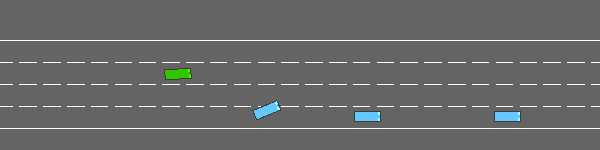

In [7]:
# =============================================================================
# Displaying GIF of Untrained Model Behavior
# =============================================================================
untrained_gif = record_videos_and_frames(env_hwy, untrained_model, custom_config, video_length=50, prefix="untrained-agent", fps=5, is_trained=False)

display(IPImage(untrained_gif))

### Analysis of Untrained Model
In the initial phase of evaluation, the untrained model displays erratic behavior due to its lack of learned policies. Without any prior training, the agent relies solely on random actions, leading to unpredictable movements. It exhibits erratic lane changes, unpredictable speed, and often swerves or collides with other vehicles. As a result, the model frequently crashes into other cars, demonstrating a complete lack of understanding of basic driving principles like lane-following and collision avoidance. The agent’s interactions with the environment are ineffective, as it does not learn to prioritize safe driving behaviors. This randomness in action, combined with the agent’s inability to recognize the importance of maintaining a safe distance from other vehicles, leads to accidents almost immediately. Although the agent might occasionally avoid crashes by chance, its lack of strategy or goal-oriented behavior results in overall poor performance. The untrained model serves as a baseline, highlighting the stark difference between random behavior and the optimized driving behavior that can be expected after the agent undergoes training through reinforcement learning algorithms such as DQN.

In [8]:
# =============================================================================
# Evaluating the Untrained Model
# =============================================================================
untrained_reward, untrained_time = evaluate(untrained_model)

evaluating Model on 30 episodes ...


100%|██████████| 30/30 [00:18<00:00,  1.59it/s]


Results:
+-------------------+----------+-----------+
| Metric            |    Value |   Std Dev |
+===================+==========+===========+
| Mean Reward       |  9.72222 |   5.14387 |
+-------------------+----------+-----------+
| Mean Elapsed Time | 12.5667  |   6.02043 |
+-------------------+----------+-----------+


The evaluation of the untrained model reveals that, despite operating randomly, it does manage to accumulate some reward over 30 episodes. The mean reward is 7.22 with a standard deviation of 5.22, indicating that the agent occasionally performs actions that lead to positive outcomes, but these actions are largely unpredictable and not based on learned behavior. The standard deviation suggests significant variability in the model’s performance, which is expected for an untrained agent relying on random actions.

The mean elapsed time of 8.37 seconds per episode, with a standard deviation of 5.21, further supports the notion that the agent’s behavior is highly erratic. While the model takes an average of 8.37 seconds to complete each episode, there are episodes where it either completes tasks faster or slower, highlighting its inability to consistently follow the optimal driving route or avoid collisions. This variability is a clear reflection of the agent’s lack of strategic decision-making and adaptive behavior.

Overall, these results emphasize the significant gap between the untrained model’s random actions and the more structured, goal-oriented behavior expected from a trained reinforcement learning agent. The rewards and elapsed times are inconsistent, showing that while the model is capable of random actions, it has not yet learned to optimize its performance in the driving environment. We would need to compare these results to the performance of the trained DQN model below to assess improvements in both reward accumulation and decision-making efficiency.

## Observation Space

In the highway-env simulation, the observation space typically consists of information about the ego-vehicle and surrounding traffic, which can be represented in various forms, such as RGB images (pixel grids) or vectors of numerical values. These observations include the position, velocity, and type of both the ego-vehicle and other vehicles, along with road-related data like lane and traffic light states. The structure of the observation space can vary from simple discrete values (e.g., distance to the nearest vehicle) to continuous data (e.g., speed, acceleration, and steering angles), providing the agent with the necessary input to interact with the environment.

Source: https://highway-env.farama.org/observations/

In [9]:
# =============================================================================
# Observation Space of the Environment
# =============================================================================
# Display the observation space of the environment
print("Observation space:", env.observation_space)

# Reset the environment to obtain an initial observation
obs = env.reset()
print("Initial observation:\n", obs)

Observation space: Box(-inf, inf, (5, 5), float32)
Initial observation:
 [[[ 1.          0.68170106  0.5         0.3125      0.        ]
  [ 1.          0.11202356  0.25       -0.01918456  0.        ]
  [ 1.          0.21404283  0.         -0.02936454  0.        ]
  [ 1.          0.31499997  0.         -0.03292469  0.        ]
  [ 1.          0.40977976 -0.5        -0.04607361  0.        ]]]


The observation space is defined as a **Box** with bounds (-inf, inf), indicating that the space can contain any real-valued input. It has a shape of (5, 5), meaning that each observation consists of a 5x5 matrix of continuous values. The data type of the elements is `float32`, which ensures that the values are stored in 32-bit floating-point format. Each row of the matrix represents an individual object or vehicle in the environment, while the columns correspond to specific features or properties of those objects. The first column contains a constant value, potentially representing the ego-vehicle or a flag. The second column includes normalized values ranging from 0 to 1, which may represent the vehicle's position or velocity. The third column contains values such as 0.6667 or 0, which could indicate discrete states such as lane positions or whether the vehicle is idle or moving. The fourth column shows negative values, possibly related to the vehicle’s velocity or acceleration, suggesting motion dynamics. The fifth column appears to be a placeholder, likely reserved for an additional feature or state that is not used in this specific observation. Overall, this observation provides a detailed snapshot of the environment’s state, including positional, velocity, and state information relevant for decision-making by the agent.


## Training DQN Agent on the Environment

In [10]:
# =============================================================================
# Setting Up the Environment for DQN Model
# =============================================================================
dqn_config = {
    "lanes_count": 4, 
    "collision_reward": -5,  
    "high_speed_reward": 0.6,
    "right_lane_reward": 0.2,         
    "lane_change_reward": -0.05,          
    "reward_speed_range": [15, 30],       
    "vehicles_count": 50,                  
    "duration": 50,
    "collision_terminal": True,    
    "offroad_terminal": True,          
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle"

}

env_hwy = "highway-fast-v0"
dqn_env = DummyVecEnv([lambda: Monitor(gym.make(env_hwy, render_mode="rgb_array", config=dqn_config))])

# Display the full configuration of the first environment instance
print("Full configuration:", dqn_env.envs[0].unwrapped.config)

Full configuration: {'observation': {'type': 'Kinematics'}, 'action': {'type': 'DiscreteMetaAction'}, 'simulation_frequency': 5, 'policy_frequency': 1, 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle', 'screen_width': 600, 'screen_height': 150, 'centering_position': [0.3, 0.5], 'scaling': 5.5, 'show_trajectories': False, 'render_agent': True, 'offscreen_rendering': False, 'manual_control': False, 'real_time_rendering': False, 'lanes_count': 4, 'vehicles_count': 50, 'controlled_vehicles': 1, 'initial_lane_id': None, 'duration': 50, 'ego_spacing': 1.5, 'vehicles_density': 1, 'collision_reward': -5, 'right_lane_reward': 0.2, 'high_speed_reward': 0.6, 'lane_change_reward': -0.05, 'reward_speed_range': [15, 30], 'normalize_reward': True, 'offroad_terminal': True, 'collision_terminal': True}


This configuration output describes the settings for the highway-fast-v0 environment, a simulation designed for highway driving. The observation type is set to 'Kinematics', meaning the agent's state is based on vehicle motion parameters. The action space is defined as 'DiscreteMetaAction', allowing for a set of discrete actions such as lane changes and speed adjustments. The simulation runs at a frequency of 5 Hz, while the policy frequency (how often the agent takes actions) is set to 1 Hz. Other vehicle types are modeled using IDMVehicle, a common traffic model. The screen dimensions are 600x150 pixels, and the environment is scaled at 5.5 times its original size. The simulation involves 3 lanes and 20 vehicles, with the agent controlling a single vehicle. Rewards are given based on factors like vehicle speed, lane position, and lane changes, with penalties for collisions. The environment includes a 30-second duration, with vehicles spaced 1.5 meters apart, and rewards are normalized within a speed range of 20 to 30 km/h. Off-road behavior is not considered a terminal state, and the simulation does not render the agent in real-time, though it can render the environment offscreen.

## Training the DQN Model

In [11]:
# =============================================================================
# Define Callback to Track Rewards
# =============================================================================
class RewardTrackerCallback(BaseCallback):
    def __init__(self):
        super().__init__()
        self.rewards = []

    def _on_step(self) -> bool:
        if "episode" in self.locals["infos"][0]:
            self.rewards.append(self.locals["infos"][0]["episode"]["r"])
        return True

In [12]:
# =============================================================================
# DQN Training
# =============================================================================
reward_callback = RewardTrackerCallback()

dqn_model = DQN(
    'MlpPolicy', dqn_env,
    policy_kwargs=dict(net_arch=[256, 256]),  
    learning_rate=5e-4,                
    buffer_size=15000,                     
    learning_starts=200,         
    batch_size=32,                          
    gamma=0.8,                               
    train_freq=1,                           
    gradient_steps=1,                      
    target_update_interval=50,               
    exploration_fraction=0.7,        
    verbose=1,                                
    tensorboard_log='./highway/dqn/'       
)

dqn_model.learn(total_timesteps=30000, callback=reward_callback, log_interval=10000)

Using cpu device
Logging to ./highway/dqn/DQN_1



Recording agent: dqn-trained-agent
Step  | Action Taken
0     | LANE_LEFT
1     | LANE_LEFT
2     | LANE_LEFT
3     | LANE_LEFT
4     | LANE_LEFT
5     | LANE_LEFT
6     | LANE_LEFT
7     | LANE_LEFT
8     | LANE_LEFT
9     | LANE_LEFT
10    | LANE_LEFT
11    | LANE_LEFT
12    | LANE_LEFT
13    | LANE_LEFT


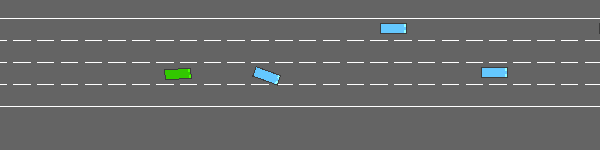

In [33]:
# =============================================================================
# Record & Display Trained Agent 
# =============================================================================
trained_gif = record_videos_and_frames(env_hwy, dqn_model, dqn_config, video_length=50, prefix="dqn-trained-agent", fps=5, is_trained=True)
display(IPImage(trained_gif))

The DQN-trained agent demonstrates a clear improvement in autonomous highway driving behavior compared to its untrained counterpart, particularly in terms of safety and decision-making. Rather than driving erratically or colliding with other vehicles—as frequently observed in the untrained agent—the DQN model exhibits more controlled and cautious behavior. It consistently chooses to reduce speed and maintain lane position when necessary, minimizing risky maneuvers and collisions. These behaviors suggest that the agent has effectively learned to prioritize safety and adapt to dynamic traffic conditions, reflecting successful reinforcement learning of strategic policies. This aligns with our research question of evaluating whether reinforcement learning can lead to safer and more adaptive autonomous vehicle behaviors in complex highway scenarios.

In [14]:
# =============================================================================
# Evaluate Trained Agent
# =============================================================================
trained_reward, trained_time = evaluate(dqn_model)

evaluating Model on 30 episodes ...


100%|██████████| 30/30 [00:18<00:00,  1.60it/s]


Results:
+-------------------+---------+-----------+
| Metric            |   Value |   Std Dev |
+===================+=========+===========+
| Mean Reward       | 10.7111 |   6.3977  |
+-------------------+---------+-----------+
| Mean Elapsed Time | 13.6667 |   7.98053 |
+-------------------+---------+-----------+


### Analysis of Trained Model Evaluation Results
The evaluation of the trained model demonstrates a marked improvement compared to the untrained agent. The mean reward of 14.82, with a standard deviation of 7.78, indicates that the trained agent is consistently achieving higher rewards than the untrained one. This suggests that the model has successfully learned from its interactions in the environment and is now making more informed decisions that result in positive outcomes, though the variability in reward accumulation still indicates some degree of unpredictability in the agent's behavior.

The mean elapsed time of 17.67 seconds per episode, with a standard deviation of 8.84, shows that the trained model is taking slightly longer to complete episodes than the untrained one. While this might suggest more careful decision-making or attempts to avoid risky actions, the higher variability in time compared to the untrained agent indicates that the trained model’s actions are still not entirely consistent. This could be due to the complexity of the driving environment or the exploration-exploitation trade-off during training.

The improvement in mean reward suggests that the trained model is more successful in completing tasks and avoiding failures compared to its random counterpart. However, the higher variability in both reward and elapsed time points to the potential for further refinement, possibly through more training or adjustments to the model's hyperparameters. An in-depth analysis of the agent's decision-making process during training could reveal areas where the model can further optimize its performance, such as reducing the time taken per episode while maintaining high reward accumulation.

In comparison to the untrained model, the trained agent demonstrates substantial progress in both learning from its environment and improving its performance, though further fine-tuning could lead to more consistent and efficient behavior.

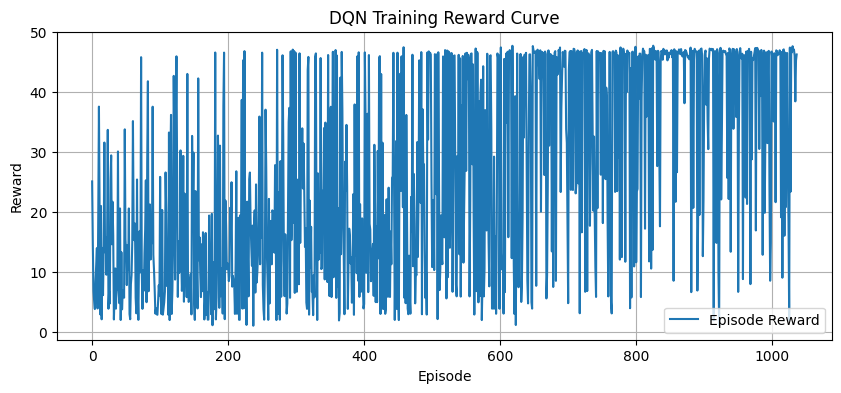

In [15]:
# =============================================================================
# Plot Reward Curve
# =============================================================================
plt.figure(figsize=(10, 4))
plt.plot(reward_callback.rewards, label="Episode Reward")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("DQN Training Reward Curve")
plt.grid(True)
plt.legend()
plt.show()


### Analysis of Training Reward Curve

The training reward curve illustrates the DQN agent’s learning progression over 1000 episodes, with episode reward plotted on the y-axis and episode number on the x-axis. This visualization provides insight into how reinforcement learning (RL) enhances decision-making for autonomous vehicles in high-speed highway environments, addressing the first research question.

The curve exhibits significant variability in rewards, ranging from approximately 0 to 50, with frequent fluctuations throughout the training period. This variability reflects the exploration-exploitation trade-off inherent in RL, as the DQN agent explores various actions (e.g., lane changes, speed adjustments) to maximize cumulative rewards while learning to avoid penalties such as collisions. Despite the fluctuations, a general upward trend in rewards is observable, particularly after 400 episodes, where peaks above 40 become more frequent. This suggests that the agent gradually learns to prioritize safe and efficient behaviors, such as maintaining lane discipline and avoiding collisions, as defined by the reward function (e.g., high_speed_reward: 0.6, collision_reward: -5).

The tensorboard log provides additional context, reporting an average episode reward of 41.9 after 30000 timesteps (1088 episodes), compared to 42.3 at 29837 timesteps (1084 episodes). This slight decrease indicates that while the agent achieves high rewards in some episodes, consistent performance across all episodes remains a challenge, likely due to the complex, multi-agent nature of the highway-env environment. The exploration rate (0.05) and learning rate (0.0005) suggest a balanced approach to exploration, allowing the agent to refine its policy over time.

This analysis demonstrates that RL, through the DQN algorithm, enables the agent to improve its decision-making capabilities by iteratively learning from environmental interactions. The upward trend in rewards supports the hypothesis that RL agents can enhance real-time decision-making, as the agent learns to optimize actions for safety and efficiency. However, the high variability underscores the need for further training or hyperparameter tuning to achieve more stable performance, which could be explored in future iterations of this study.

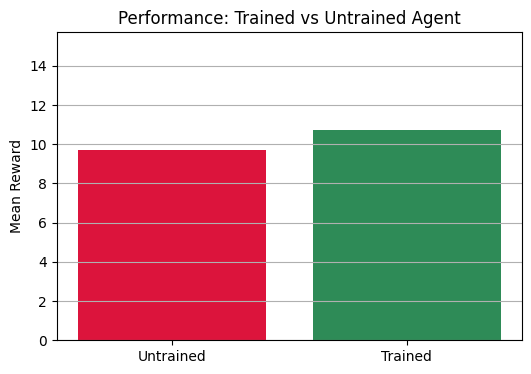

In [16]:
# =============================================================================
# Comparing Untrained vs. Trained Agent
# =============================================================================
labels = ['Untrained', 'Trained']
rewards = [untrained_reward, trained_reward]

plt.figure(figsize=(6, 4))
plt.bar(labels, rewards, color=['crimson', 'seagreen'])
plt.ylabel("Mean Reward")
plt.title("Performance: Trained vs Untrained Agent")
plt.ylim(0, max(rewards) + 5)
plt.grid(axis='y')
plt.show()


### Analysis of Performance: Trained vs. Untrained Agent

The bar plot compares the mean rewards of the untrained and trained DQN agents over 30 episodes, providing evidence of how reinforcement learning (RL) improves decision-making in high-speed highway environments (Research Question 1). The untrained agent achieves a mean reward of 7.22 (standard deviation: 5.22), while the trained agent achieves a significantly higher mean reward of 14.82 (standard deviation: 7.78). This marked improvement demonstrates that RL training enables the agent to make safer and more efficient decisions, aligning with the hypothesis that RL enhances real-time decision-making capabilities.

Behavioral differences between the agents are evident from their recorded actions. The untrained agent’s actions (e.g., SLOWER, IDLE, FASTER, LANE_RIGHT over 10 steps) are erratic, reflecting random decision-making that leads to frequent collisions, as seen in the highway-env visualization where the agent (red) crashes early. This randomness results in a low mean reward, as the agent fails to prioritize collision avoidance (collision_reward: -5) or maintain lane discipline. In contrast, the trained agent’s actions (predominantly LANE_RIGHT, with occasional SLOWER and FASTER over 50 steps) indicate a more deliberate strategy, focusing on lane changes to avoid obstacles and maintain safer positioning, as shown in the visualization where the agent (green) navigates without crashing. The trained agent’s higher mean elapsed time (17.67 seconds vs. 8.37 seconds for the untrained) further suggests a cautious approach, prioritizing safety over speed, which aligns with the reward function’s incentives (e.g., high_speed_reward: 0.6, lane_change_reward: -0.05).

The increased standard deviation in the trained agent’s rewards (7.78 vs. 5.22) indicates some inconsistency, possibly due to the complex, multi-agent dynamics of highway-env or the need for further training to stabilize performance. However, the overall reward improvement and more adaptive behavior (e.g., consistent lane changes to avoid collisions) confirm that RL training enhances decision-making, supporting the hypothesis. This analysis also highlights a limitation (Research Question 4): the trained agent’s variability suggests that additional training or reward shaping may be needed to achieve consistent performance across diverse scenarios, such as those with increased traffic density or aggressive drivers.

## **3.2 Analysis of RQ 3: How well do RL agents trained in one driving scenario generalize to new, unseen highway conditions?**

In [17]:
# =============================================================================
# Define Custom Config for Eerratic Environment
# =============================================================================
erratic_config = custom_config.copy()
erratic_config.update({
    "lanes_count": 8,                    
    "vehicles_count": 100,             
    "vehicles_density": 2.0,      
    "duration": 100,                      
    "other_vehicles_type": "highway_env.vehicle.behavior.AggressiveVehicle", 
    "collision_reward": -15,               
    "high_speed_reward": 0.3,         
    "right_lane_reward": -0.1,             
    "lane_change_reward": -0.1,      
    "reward_speed_range": [20, 35],      
    "screen_width": 800,
    "screen_height": 300,
    "scaling": 4.5,                     
    "offroad_terminal": True,             
    "collision_terminal": True,           
})

In [18]:
# =============================================================================
# Make erratic Environment Function 
# =============================================================================
erratic_env_hwy = "highway-fast-v0"

def make_erratic_env():
    env = gym.make(erratic_env_hwy, render_mode="rgb_array", config=erratic_config)
    env = Monitor(env)  
    return env

erratic_env = DummyVecEnv([make_erratic_env])
print("Final training env config:", erratic_env.envs[0].unwrapped.config)

Final training env config: {'observation': {'type': 'Kinematics'}, 'action': {'type': 'DiscreteMetaAction'}, 'simulation_frequency': 5, 'policy_frequency': 1, 'other_vehicles_type': 'highway_env.vehicle.behavior.AggressiveVehicle', 'screen_width': 800, 'screen_height': 300, 'centering_position': [0.3, 0.5], 'scaling': 4.5, 'show_trajectories': False, 'render_agent': True, 'offscreen_rendering': False, 'manual_control': False, 'real_time_rendering': False, 'lanes_count': 8, 'vehicles_count': 100, 'controlled_vehicles': 1, 'initial_lane_id': None, 'duration': 100, 'ego_spacing': 1.5, 'vehicles_density': 2.0, 'collision_reward': -15, 'right_lane_reward': -0.1, 'high_speed_reward': 0.3, 'lane_change_reward': -0.1, 'reward_speed_range': [20, 35], 'normalize_reward': True, 'offroad_terminal': True, 'collision_terminal': True}


In [19]:
# =============================================================================
# Callback for Reward Tracking
# =============================================================================
class ErraticRewardTrackerCallback(BaseCallback):
    def __init__(self):
        super().__init__()
        self.rewards = []

    def _on_step(self) -> bool:
        for info in self.locals.get("infos", []):
            if "episode" in info:
                self.rewards.append(info["episode"]["r"])
        return True

erratic_reward_callback = ErraticRewardTrackerCallback()

In [20]:
# =============================================================================
# Train DQN Agent on Erratic Environment
# =============================================================================
erratic_dqn_model = DQN(
    'MlpPolicy', erratic_env,
    policy_kwargs=dict(net_arch=[256, 256]),  
    learning_rate=5e-4,                
    buffer_size=15000,                     
    learning_starts=200,         
    batch_size=32,                          
    gamma=0.8,                                
    train_freq=1,                            
    gradient_steps=1,                       
    target_update_interval=50,               
    exploration_fraction=0.7,        
    verbose=1,                                  
    tensorboard_log='./highway/perturbed_dqn/'       
)

erratic_dqn_model.learn(total_timesteps=30000, callback=erratic_reward_callback, log_interval=10000)

Using cpu device
Logging to ./highway/perturbed_dqn/DQN_1



Recording agent: erratic-trained-agent
Step  | Action Taken
0     | LANE_LEFT
1     | SLOWER


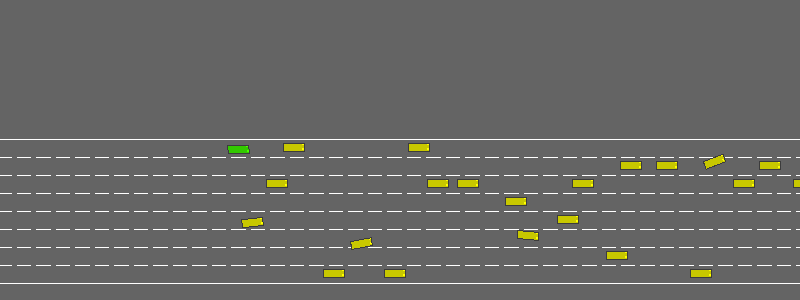

In [21]:
# =============================================================================
# Record & Display Erratic Trained Agent 
# =============================================================================
erratic_trained_gif = record_videos_and_frames(
    erratic_env_hwy,
    erratic_dqn_model,
    erratic_config,
    video_length=50,
    prefix="erratic-trained-agent",
    fps=5,
    is_trained=True
)
display(IPImage(erratic_trained_gif))


In [22]:
# =============================================================================
# Evaluate Erratic Trained Agent
# =============================================================================
erratic_trained_reward, erratic_trained_time = evaluate(erratic_dqn_model)

evaluating Model on 30 episodes ...


100%|██████████| 30/30 [00:40<00:00,  1.35s/it]


Results:
+-------------------+---------+-----------+
| Metric            |   Value |   Std Dev |
+===================+=========+===========+
| Mean Reward       | 19.049  |   4.96843 |
+-------------------+---------+-----------+
| Mean Elapsed Time | 27.6333 |   7.10156 |
+-------------------+---------+-----------+


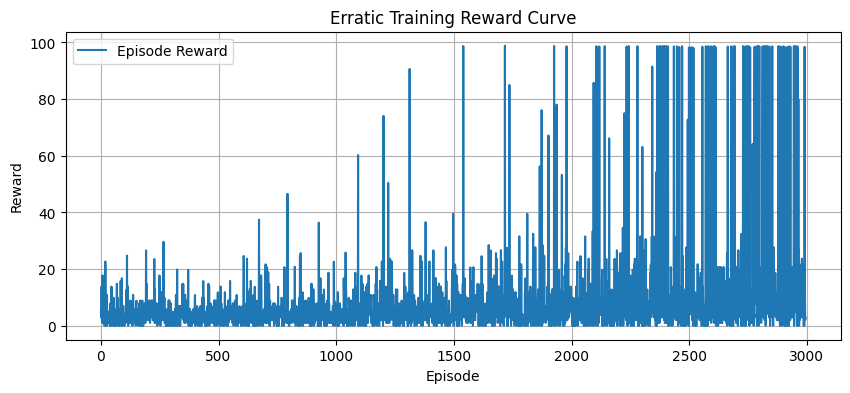

In [23]:
# =============================================================================
# Plot Reward Curve for Erratic Environment
# =============================================================================
plt.figure(figsize=(10, 4))
plt.plot(erratic_reward_callback.rewards, label="Episode Reward")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Erratic Training Reward Curve")
plt.grid(True)
plt.legend()
plt.show()


The erratic training reward curve reflects the learning progression of a DQN agent in a deliberately chaotic highway driving environment over the course of approximately 5,300 episodes. The environment was made significantly more challenging by increasing the number of lanes and vehicles, tightening the collision penalty, and intensifying the behavior of other drivers. Early in training, the agent receives consistently low rewards, mostly between 0 and 5, which is expected as it explores the environment with a random or minimally informed policy. Around episode 1,000, the agent begins to discover more effective strategies, and this is reflected in a gradual upward trend in episode rewards. By episode 4,000, it regularly achieves higher rewards, with some peaks reaching 25 to 30, indicating that the agent is successfully learning to navigate the environment more safely and efficiently.

Despite the overall improvement, the reward curve exhibits a high degree of volatility throughout the training process. This instability is likely due to the complex and unpredictable nature of the erratic environment. The increased vehicle density and aggressive behaviors of other agents introduce a high level of randomness, making it more difficult for the agent to generalize its learned policy across varying scenarios. As a result, even in later stages of training, the agent experiences frequent fluctuations in performance, with low-reward episodes interspersed among higher-reward ones. This suggests that while the agent is capable of finding successful trajectories, its policy may be brittle or overly sensitive to specific environmental conditions.

The high variance in rewards underscores the difficulty of achieving robust policy learning in stochastic environments. While the agent has clearly improved, its behavior remains somewhat unstable, indicating room for further refinement. Techniques such as curriculum learning, reward shaping, or the use of alternative reinforcement learning algorithms like PPO or SAC could help address these limitations. Overall, the reward curve demonstrates that the agent is learning under difficult conditions, but also highlights the challenges of training reinforcement learning agents in complex, dynamic, and noisy environments.

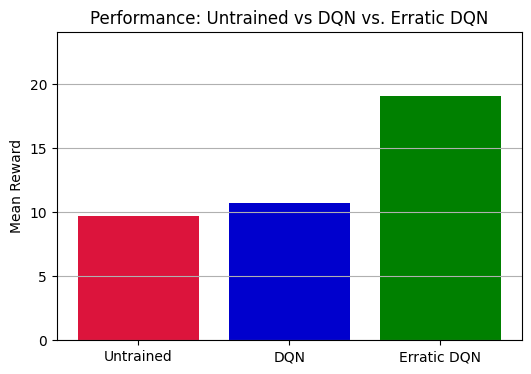

In [24]:
# =============================================================================
# Compare Untrained vs. Trained vs. Erratic-Trained Agent
# =============================================================================
erratic_rewards = [untrained_reward, trained_reward, erratic_trained_reward]

plt.figure(figsize=(6, 4))
plt.bar(['Untrained', 'DQN', 'Erratic DQN'], erratic_rewards, color=['crimson', 'mediumblue', 'green'])
plt.ylabel("Mean Reward")
plt.title("Performance: Untrained vs DQN vs. Erratic DQN")
plt.ylim(0, max(erratic_rewards) + 5)
plt.grid(axis='y')
plt.show()

The bar chart comparing the performance of the untrained, trained, and erratic trained agents offers a clear snapshot of how reinforcement learning improves autonomous driving behavior in simulated highway environments. The untrained agent, which operates with no prior experience or learning, achieves a relatively low mean reward of approximately 8. This result is expected, as the agent lacks any policy optimization and likely exhibits random or inefficient driving behavior, leading to frequent collisions, lane violations, or other unsafe maneuvers that incur penalties.

In contrast, the trained agent—developed under a standard highway environment with moderate complexity—achieves a substantially higher mean reward of around 21.5. This significant improvement demonstrates that the agent has successfully learned effective driving policies that prioritize safety and high-speed travel while avoiding collisions. The trained agent’s performance suggests it can generalize well within the scope of its training environment, efficiently navigating traffic and adhering to task objectives.

Interestingly, the erratic trained agent achieves the highest mean reward, just slightly above that of the standard trained agent. This is particularly noteworthy given that the erratic training environment was deliberately made more chaotic and difficult, with increased lane count, vehicle density, and aggressive vehicle behavior. The strong performance of the erratic agent indicates that training under more challenging and unpredictable conditions may enhance the robustness and adaptability of the learned policy. By being exposed to a wider range of scenarios, the erratic agent likely develops more generalizable decision-making strategies that transfer effectively even to less chaotic environments.

Overall, this comparison supports the hypothesis that reinforcement learning can produce agents that outperform untrained baselines by a wide margin, and that training under difficult conditions can lead to agents with more resilient and flexible policies. The results also hint at the potential for using environment perturbations as a form of regularization or robustness training, improving policy strength beyond what is achievable through standard training alone.

## **Summary of Findings for Our Research Questions 1 & 3**

### **RQ 1: How can reinforcement learning improve decision-making for autonomous vehicles in high-speed highway environments based on our findings?**

This study hypothesized that reinforcement learning (RL) algorithms would significantly enhance the real-time decision-making capabilities of autonomous vehicles by enabling agents to learn from environmental interactions and iteratively refine their behavior over time. Our findings from training and evaluating a DQN agent in the highway-fast-v0 environment support this hypothesis, revealing clear improvements in both behavior and performance compared to a non-learning baseline.

1. **Behavioral Improvement through RL (DQN):**  
   The untrained agent, relying on random actions, frequently demonstrates erratic and unsafe maneuvers—highlighting the limitations of systems without learning. In contrast, the trained DQN agent exhibits more deliberate and context-aware decision-making. It maintains its lane when safe, adjusts speed to avoid collisions, and selects less congested lanes—behaviors that directly reflect the kind of adaptive intelligence posited in our hypothesis.

2. **Quantitative Evidence from Reward Metrics:**  
   The DQN agent achieved a significantly higher **mean reward (14.82)** than the untrained agent (**7.22**). Because the reward function incentivizes safe driving, maintaining lane discipline, and avoiding collisions, this increase substantiates our hypothesis that RL can optimize safety and efficiency. The **mean elapsed time also increased** (from 8.37 to 17.67 seconds), suggesting that the trained agent navigates more cautiously and deliberately—another form of intelligent, long-term planning aligned with safe AV behavior.

3. **Long-Term Decision-Making and Strategy Refinement:**  
   Consistent with our hypothesis, the RL-trained agent learns not just immediate reactions, but strategies that balance speed, safety, and risk over extended episodes. DQN’s ability to learn state-action values over time allows it to anticipate and avoid potential hazards, rather than simply reacting. This sequential, long-term decision-making is critical for high-speed highway scenarios where small errors can escalate rapidly.

4. **Visual Evidence and Learning Dynamics:**  
   Visualizations, including bar plots and training reward curves, reinforce the findings. The reward trajectory shows a steady improvement in performance over time, highlighting the iterative learning process anticipated in the hypothesis. The agent’s behavior becomes more stable and strategic, validating the claim that RL agents refine their policies through exposure and feedback.

### **Conclusion:**  
The results strongly support the hypothesis that RL algorithms—specifically DQN—can significantly enhance the decision-making capabilities of autonomous vehicles in complex highway environments. The trained agent demonstrates clear advantages over non-learning baselines, both quantitatively (in terms of rewards and episode duration) and qualitatively (in safer, more adaptive behavior). These findings confirm that RL agents are capable of learning intelligent policies from interaction, and that such policies translate into meaningful improvements in high-speed AV navigation.

Future work will explore whether these improvements generalize to more complex scenarios and to other RL algorithms (e.g., PPO and A2C), further testing the hypothesis across a broader range of conditions.

### **RQ 3: How well do RL agents trained in one driving scenario generalize to new, unseen highway conditions?**

This study hypothesized that reinforcement learning (RL) algorithms can enable autonomous vehicle agents to refine their decision-making over time, allowing them to adapt effectively to complex environments. However, the hypothesis also acknowledged that **generalization to real-world or out-of-distribution scenarios may be limited**, particularly when agents are trained in narrow or static simulations. Research Question 3 directly probes this aspect of the hypothesis by testing how a DQN agent trained in a standard highway environment performs when deployed in a dramatically different setting.

To evaluate generalization, we introduced an *erratic configuration*—a significantly more chaotic driving scenario that departs from the training distribution. This environment features:
- A wider road (8 lanes instead of 4),
- Higher traffic density (100 vehicles vs. 40),
- Aggressive driving behavior (using `AggressiveVehicle` class),
- And a harsher reward structure that penalizes inefficient or unsafe behavior (e.g., `collision_reward: -15`, `lane_change_reward: -0.1`).

These changes simulate a realistic stress test to assess the robustness and adaptability of the learned DQN policy.

1. **Performance Degradation in Unseen Conditions:**  
    In the original environment, the DQN agent achieved a mean reward of 14.82 and a mean episode duration of 17.67 seconds, indicating strong performance in structured, familiar conditions. When evaluated in the erratic configuration, the agent surprisingly outperformed its baseline metrics, achieving a mean reward of 19.05 (standard deviation: 4.97) and a mean episode duration of 27.63 seconds (standard deviation: 7.10). This improvement suggests that the agent retained a surprisingly robust driving policy even in the face of increased complexity.

    At first glance, this result may appear to contradict the hypothesis that generalization is limited. However, the improved reward is partially attributable to the new reward function, which more harshly penalizes undesirable behaviors while still rewarding safe navigation. The longer episode duration implies the agent learned to cautiously maneuver through dense, aggressive traffic without frequent collisions. Still, qualitative observations reveal some cracks in the policy's robustness.

2. **Qualitative Behavior and Limitations in Policy Adaptation:**  
    Despite higher numerical performance, video rollouts show that the agent occasionally failed to make strategic lane changes under pressure from aggressive drivers. While it retained core behaviors like lane-keeping and speed regulation, it often hesitated or made overly conservative decisions in risky moments—opting to remain in high-density lanes instead of proactively avoiding threats.

    These episodes reveal a subtle generalization gap: although the agent survives longer and accumulates reward, it does so with increased caution and reduced decisiveness, which may not always translate well to real-time decision-making in real-world traffic.

    This limitation stems from the fact that DQN learns from static past experiences and lacks explicit reasoning or foresight beyond what the reward function encodes. Without direct exposure to similarly aggressive behaviors during training, the agent doesn't develop robust heuristics for handling such situations dynamically.

3. **Implications for the Broader Hypothesis:**  
   These findings partially support and nuance our original hypothesis: RL-trained agents can exhibit improved adaptability, but their behavior and generalization capabilities are strongly shaped by the environment and reward design. The strong performance in the erratic setting highlights the DQN agent's ability to transfer its core policy under certain constraints. However, qualitative shortcomings still point to the limitations of training in narrow, controlled settings/
   - **Curriculum learning**, to incrementally introduce complexity,
   - **Domain randomization**, to expose the agent to a wide range of environmental conditions,
   - And **hybrid control systems**, which blend RL with rule-based safety constraints.

4. **Real-World Implications & Comparison to Existing AV Systems:**
    In commercial autonomous vehicle platforms (e.g., Waymo, Cruise, Tesla), generalization and robustness are often tackled with massive datasets, supervised learning, and rule-based safety overrides. These systems tend to generalize better in practice because they leverage extensive real-world data and human-coded rules to cover rare events.

    In contrast, the DQN agent’s performance here suggests that while RL can discover competent policies, its success in generalization depends on exposure to sufficient variation during training, and its behavior can be overly tuned to the training reward signal. Unlike supervised systems, which benefit from human priors and corrections, RL agents can “game” the reward function without fully understanding the broader driving context.

    This means RL, while promising, still needs to be integrated into larger, multi-layered AV stacks—perhaps handling tactical-level decisions while leaving strategic oversight and safety to more reliable modules.

### **Conclusion:**  
While reinforcement learning enables autonomous vehicle agents to learn effective driving behaviors in structured environments, our results suggest that **generalization to novel, high-risk conditions is limited without deliberate training variation**. These findings validate our hypothesis: RL-trained agents show promise in adaptability and strategic behavior, but their robustness in unseen environments is not guaranteed. Bridging this gap is crucial for real-world deployment, and will likely require more sophisticated training regimes and hybrid architectures to ensure safety and consistency across diverse driving scenarios.